<a href="https://colab.research.google.com/github/EricWay1024/EricSummer2022/blob/main/DIRECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('hello')

hello


In [ ]:
%pip install git+https://github.com/CardiacModelling/BenNevis.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/CardiacModelling/BenNevis.git to /tmp/pip-req-build-bc9d1ucw
  Running command git clone -q https://github.com/CardiacModelling/BenNevis.git /tmp/pip-req-build-bc9d1ucw


In [ ]:
import nevis

In [ ]:
help(nevis)

Help on package nevis:

NAME
    nevis - Main module for Where is Ben Nevis (it's in Scotland).

PACKAGE CONTENTS
    _bng
    _interpolation
    _nevis_version
    _os_terrain_50
    _plot
    _util

FUNCTIONS
    write_test_figure(path='gb-small.png')
        Creates and writes a test figure.

DATA
    __version_tuple__ = (0, 0, 5)

VERSION
    0.0.5

FILE
    /usr/local/lib/python3.7/dist-packages/nevis/__init__.py




In [ ]:
nevis.download_os_terrain_50()

Downloaded, unpacked, and processed file already found: Skipping.


In [ ]:
f = nevis.linear_interpolant()

In [ ]:
%pip install nlopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 424 kB 36.7 MB/s 


In [ ]:
f_grad = nevis.linear_interpolant(grad=True)
x_max, y_max = nevis.dimensions()

import nlopt
points = []
def myfunc(u, grad):
    x, y = u
    points.append([x, y])
    z, (gx, gy) = f_grad(x, y)
    if grad.size > 0:
        grad[0] = gx
        grad[1] = gy
    return z


In [ ]:
# opt = nlopt.opt(nlopt.GN_DIRECT_L, 2)
# opt = nlopt.opt(nlopt.GN_DIRECT_L_RAND, 2)
# opt = nlopt.opt(nlopt.GN_DIRECT, 2)
opt = nlopt.opt(nlopt.GN_ORIG_DIRECT_L, 2)

opt.set_lower_bounds([0, 0])
opt.set_upper_bounds([x_max, y_max])
opt.set_max_objective(myfunc)
# opt.set_maxtime(5)
# opt.set_ftol_rel(1e-4)
# opt.set_xtol_rel(5e-19)
# opt.set_ftol_abs(1000)
opt.set_maxeval(int(2e4))
points = []
x, y = opt.optimize([x_max / 2, y_max / 2])
z = opt.last_optimum_value()

In [ ]:
x, y, f(x, y)

(298948.3310470966, 798925.0, 1307.5934629924272)

In [ ]:
nevis.print_result(x, y, z)
print(len(points))

Congratulations!
You landed at an altitude of 1308m.
  https://opentopomap.org/#marker=15/57.070229/-3.668285
You are 52m from the nearest named hill top, "Ben Macdui",
  ranked the 2d heighest in GB.
  http://hillsummits.org.uk/htm_summit/518.htm
20001


In [ ]:
c = nevis.Coords(gridx=x, gridy=y)
hill, d = nevis.Hill.nearest(c)


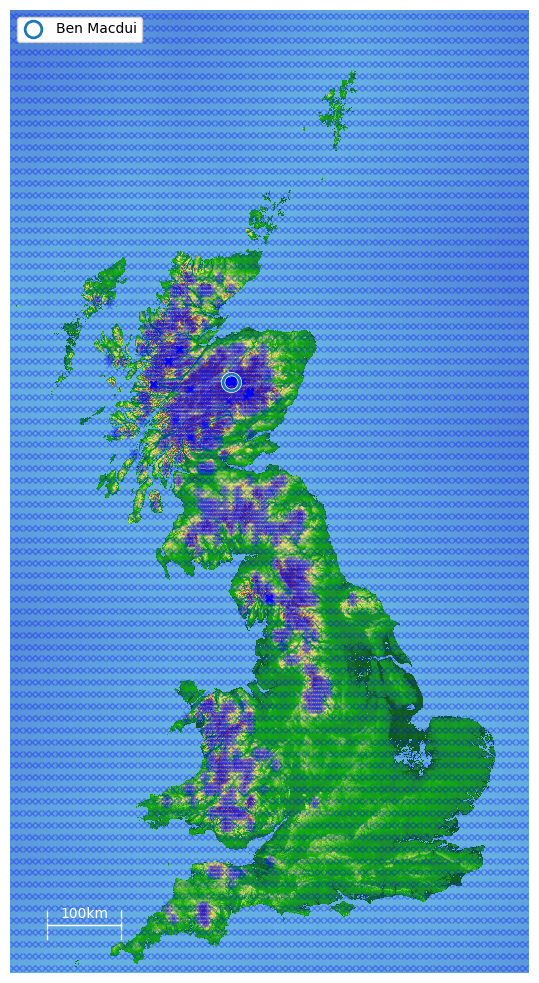

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
nevis.plot(
    labels={
        hill.name: hill.coords
    },
    points=np.array(points)
)
plt.show()